In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('salaries_processed.csv')

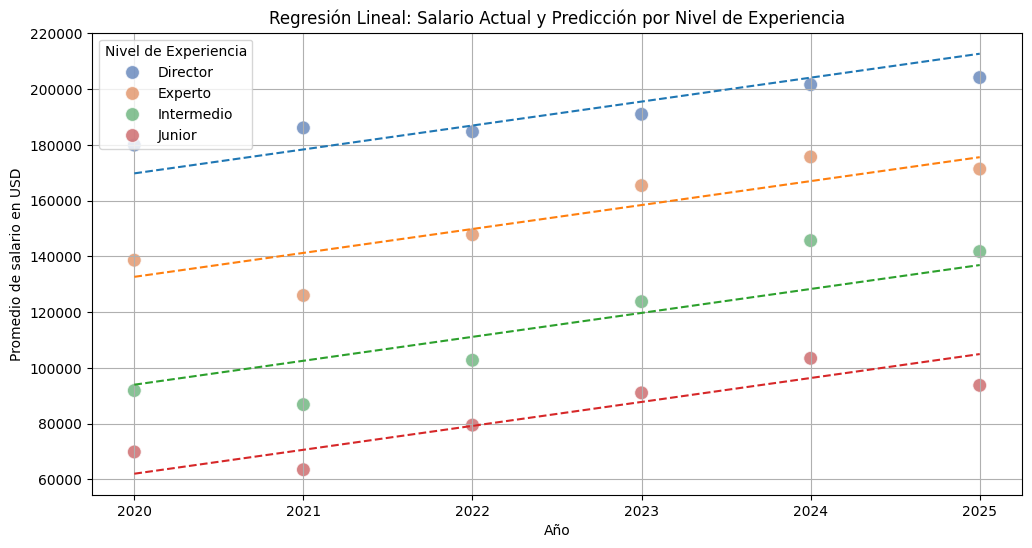

In [3]:
# Agrupar por año y experiencia
salary_trends = df.groupby(['work_year', 'experience_level']).salary_in_usd.mean().reset_index()

X = salary_trends[['work_year', 'experience_level']]
X_encoded = pd.get_dummies(X, columns=['experience_level'], drop_first=True)
y = salary_trends['salary_in_usd']

# Entrenar la regresión linear
model = LinearRegression()
model.fit(X_encoded, y)

# Predicción
salary_trends['predicted_salary'] = model.predict(X_encoded)

# Plot real vs predicción
plt.figure(figsize=(12, 6))
sns.scatterplot(x=salary_trends['work_year'], y=y, hue=salary_trends['experience_level'], s=100, palette='deep', alpha=0.7)
sns.lineplot(x=salary_trends['work_year'], y=salary_trends['predicted_salary'], hue=salary_trends['experience_level'], legend=None, linestyle='--')

plt.title('Regresión Lineal: Salario Actual y Predicción por Nivel de Experiencia')
plt.xlabel('Año')
plt.ylabel('Promedio de salario en USD')
plt.grid(True)
plt.legend(title='Nivel de Experiencia')
plt.show()

In [4]:
# calcular métricas de desempeño
mse = mean_squared_error(y, salary_trends['predicted_salary'])
r2 = r2_score(y, salary_trends['predicted_salary'])
mad = mean_absolute_error(y, salary_trends['predicted_salary'])
mape= mean_absolute_percentage_error(y, salary_trends['predicted_salary']) * 100

mse, r2, mad, mape
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")
print(f"MAD: {mad:.2f}")
print(f"MAPE: {mape:.2f}%")


MSE: 68610789.28
R²: 0.9644
MAD: 7011.73
MAPE: 5.86%


In [5]:
# Definir variables X y y (variable a predecir)
y = df['salary_in_usd']
X = df.drop('salary_in_usd', axis=1)

# Codificar variables categóricas
for col in X.columns:
    if X[col].dtype == 'object':
        encoder = LabelEncoder()
        X[col] = encoder.fit_transform(X[col])

# Dividir en set de entrenamiento y set de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [6]:
# Instantiate the Linear Regression model
lin_reg = LinearRegression()

# Train (fit) the model on the training data
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lin_reg.predict(X_test)


📊 Evaluación:
R²: 0.1797
MSE: 4,444,640,125.3912
MAD: 42,600.3456
MAPE: 34.2179%


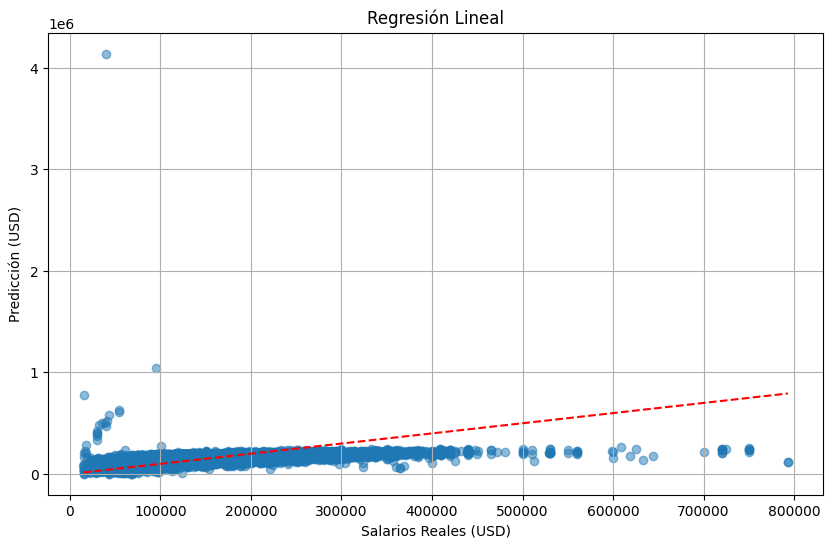

In [7]:
# Evaluar Modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mad_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr) * 100

print(f"\n📊 Evaluación:")
print(f"R²: {r2_lr:.4f}")
print(f"MSE: {mse_lr:,.4f}")
print(f"MAD: {mad_lr:,.4f}")
print(f"MAPE: {mape_lr:.4f}%")

# Gráfica actual vs predicción
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Salarios Reales (USD)")
plt.ylabel("Predicción (USD)")
plt.title("Regresión Lineal")
plt.grid(True)
plt.show()


📊 Evaluación:
R²: 0.9906
MSE: 50,877,351.3014
MAD: 297.9034
MAPE: 0.3648%


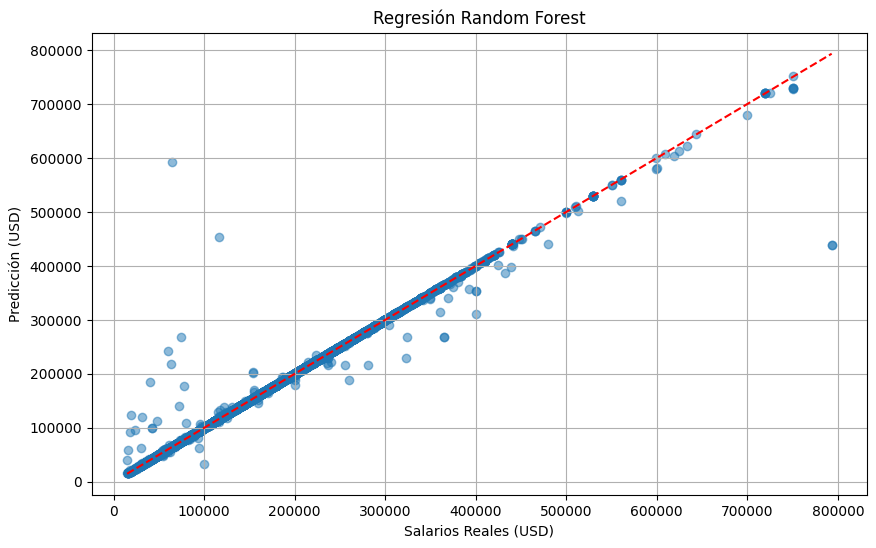

In [8]:
# Random Forest Regression

# Crear y entrenar el modelo Random Forest Regression
model = RandomForestRegressor(n_estimators=100, random_state=123)
model.fit(X_train, y_train)

# Predicciones
y_pred_rf = model.predict(X_test)

# Evaluar Modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mad_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf) * 100

print(f"\n📊 Evaluación:")
print(f"R²: {r2_rf:.4f}")
print(f"MSE: {mse_rf:,.4f}")
print(f"MAD: {mad_rf:,.4f}")
print(f"MAPE: {mape_rf:.4f}%")

# Gráfica actual vs predicción
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Salarios Reales (USD)")
plt.ylabel("Predicción (USD)")
plt.title("Regresión Random Forest")
plt.grid(True)
plt.show()


📊 Evaluación:
R²: 0.9898
MSE: 55,386,132.0000
MAD: 826.7100
MAPE: 0.6326%


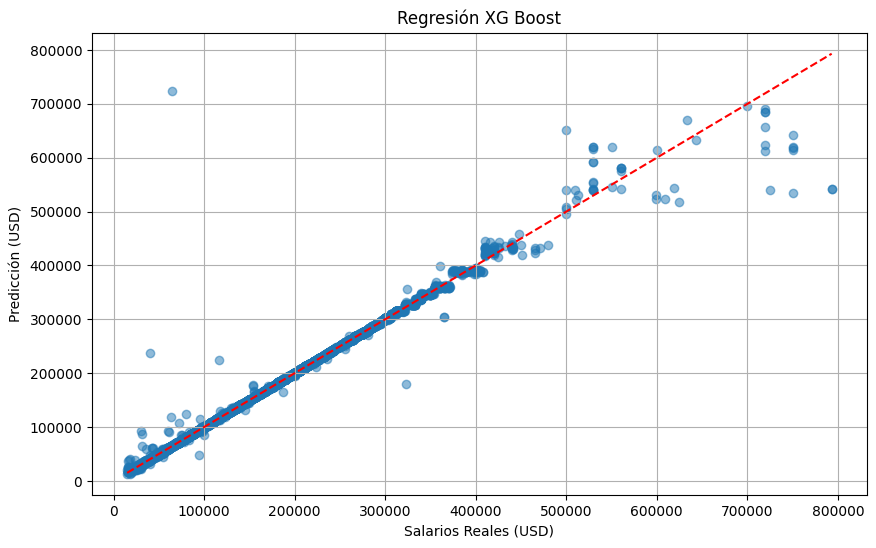

In [9]:
# Columnas Categóricas
categorical_cols = X.select_dtypes(include='object').columns.tolist()

# Preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)
# XGBoost Pipeline
xgboost = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        n_estimators=100,
        random_state=123,
        n_jobs=-1,
        verbosity=1
    ))
])


# Train the model
xgboost.fit(X_train, y_train)

# Predictions
y_pred_xg = xgboost.predict(X_test)

# Evaluar Modelo
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)
mad_xg = mean_absolute_error(y_test, y_pred_xg)
mape_xg = mean_absolute_percentage_error(y_test, y_pred_xg) * 100

print(f"\n📊 Evaluación:")
print(f"R²: {r2_xg:.4f}")
print(f"MSE: {mse_xg:,.4f}")
print(f"MAD: {mad_xg:,.4f}")
print(f"MAPE: {mape_xg:.4f}%")

# Gráfica actual vs predicción
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Salarios Reales (USD)")
plt.ylabel("Predicción (USD)")
plt.title("Regresión XG Boost")
plt.grid(True)
plt.show()